### Importing libraries

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import random
plt.style.use('ggplot')

### Data Analysis

In [11]:
train_data = pd.read_csv('data/traindata.csv')

##### Understanding the dataset

In [12]:
train_data.head(1)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [13]:
train_data.shape

(42000, 785)

We have 42000 samples x 784 pixel columns

##### Extracting data



In [15]:
labels = train_data.iloc[:,0].values               #Converting data to Numpy arrays
images = train_data.iloc[:,1:].values

images.shape

(42000, 784)

Visualizing a training example

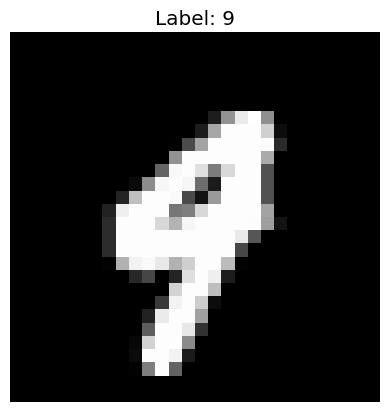

In [21]:
random_no1 = random.randint(0,42000)

image = images[random_no1].reshape(28, 28)

#Plotting it
plt.imshow(image, cmap='gray')
plt.title(f"Label: {labels[random_no1]}")
plt.axis('off')
plt.show()